In [1]:
import pandas as pd
import numpy as np
import os
import glob

pd.options.display.max_columns = None
pd.options.display.max_rows = None

inpath = '/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/'
outpath = '/MFMDatasets/MFM_bopf/src/multi_predict/results/'
out_flag = True
#out_flag = False

#Cutoff_stat = "ROC_AUC"
Cutoff_stat = "MCC"
CUTOFF = 0.200

SORT_STAT = "ROC_AUC"

alg = "LR"
alg_cols = ['under_alg','samp_strat','p_C','p_solver','precision_macro','recall_macro','F1_macro','PR_AUC','ROC_AUC','MCC','TP','FN','FP','TN']

#alg = "NB"
#alg_cols = ['target','under_alg','p_var_smoothing','seed','ROC_AUC','MCC']

#alg = "SVC"
#alg_cols = ['under_alg','samp_strat','p_C','p_kernel','p_degree','precision_macro','recall_macro','F1_macro','PR_AUC','ROC_AUC','MCC','TP','FN','FP','TN']

#alg = "MLP"
#alg_cols = ['under_alg','samp_strat','p_alpha','p_hidden_layer_sizes','precision_macro','recall_macro','F1_macro','PR_AUC','ROC_AUC','MCC','TP','FN','FP','TN']
#CUTOFF = 0.210

#alg = "RF"
#alg_cols = ['under_alg','samp_strat','p_n_estimators','p_max_depth','p_min_samples_leaf','p_min_samples_split','precision_macro','recall_macro','F1_macro','PR_AUC','ROC_AUC','MCC','TP','FN','FP','TN']

#alg = "GB"
#alg_cols = ['under_alg','samp_strat','p_n_estimators','p_max_depth','p_subsample','p_learning_rate','precision_macro','recall_macro','F1_macro','PR_AUC','ROC_AUC','MCC','TP','FN','FP','TN']
#CUTOFF = 0.230

os.chdir(inpath + alg + '/output')
#os.chdir(inpath + alg + '/Oct2020/output')
#os.chdir(inpath + alg + '/Nov2020/output')

#dataset = "transfus_yes"
#dataset = "Hysterectomy"
dataset = "*"
#dataset = "trans*"
ext = '.csv'
glob_string = dataset + "*-" + alg + "-*"
files = glob.glob(glob_string + ext)
#files = glob.glob("*-" + alg + "-*" + ext)
#files = glob.glob("transfus_yes*-" + alg + "-*" + ext)

results_df = pd.DataFrame()
#os.chdir('/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/MLP/output')
#os.chdir('/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/SVC/output')
#os.chdir('/MFMDatasets/MFM_bopf/src/multi_predict/NB/output')
#files = glob.glob("*-NB-*.csv")
#files = glob.glob("*-MLP-*.csv")
#files = glob.glob("*-SVC-*.csv")
#files = glob.glob("transfus_yes*-MLP-*.csv")
#files = glob.glob("transfus_yes*-MLP-*]_0.*_500*.csv")
#files = glob.glob("transfus_hyster*-MLP-*.csv")
#files = glob.glob("transfus_yes*-MLP-*.csv")
#files = glob.glob("transfus_yes*-MLP-*.csv")
len(files)

108

In [2]:
files = sorted(files, reverse=True)
for i in range(len(files)-1):
    if files[i][:-20] == files[i+1][:-20]:
        print(f'DUP:{files[i]}')
        #os.remove(files[i])
print(f'len(files) = {len(files)}')

DUP:transfus_yes-0-NM3-LR-0.01_10000000_7_liblinear-1-1.0-20210105_154638.csv
DUP:transfus_yes-0-NM3-LR-0.01_10000000_7_lbfgs-1-1.0-20210105_154642.csv
DUP:transfus_yes-0-NM3-LR-0.001_10000000_7_liblinear-1-1.0-20210105_154639.csv
DUP:transfus_yes-0-NM3-LR-0.001_10000000_7_lbfgs-1-1.0-20210105_154640.csv
DUP:transfus_yes-0-NM3-LR-0.0001_10000000_7_liblinear-1-1.0-20210105_154639.csv
DUP:transfus_yes-0-NM3-LR-0.0001_10000000_7_lbfgs-1-1.0-20210105_154640.csv
len(files) = 108


In [3]:
prev_f = ""
for idx, f in enumerate(files):
    #print(f'idx={idx}; file={f}')
    if prev_f[:-20] == f[:-20]:   #if the filenames only differ by timestamp
        print(f'DUP:{prev_f}')
        continue   #skip "duplicate"
        
    if results_df.empty:
        results_df = pd.read_csv(f, header=None, index_col=0, names=[idx])
    else:
        this_df = pd.read_csv(f, header=None, index_col=0, names=[idx])
        results_df = results_df.merge(this_df, left_index=True, right_index=True, how="right")
    prev_f = f
results_df

DUP:transfus_yes-0-NM3-LR-0.01_10000000_7_liblinear-1-1.0-20210105_154638.csv
DUP:transfus_yes-0-NM3-LR-0.01_10000000_7_lbfgs-1-1.0-20210105_154642.csv
DUP:transfus_yes-0-NM3-LR-0.001_10000000_7_liblinear-1-1.0-20210105_154639.csv
DUP:transfus_yes-0-NM3-LR-0.001_10000000_7_lbfgs-1-1.0-20210105_154640.csv
DUP:transfus_yes-0-NM3-LR-0.0001_10000000_7_liblinear-1-1.0-20210105_154639.csv
DUP:transfus_yes-0-NM3-LR-0.0001_10000000_7_lbfgs-1-1.0-20210105_154640.csv


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,84,86,88,90,92,94,95,96,97,98,99,100,101,102,103,104,105,106,107
CLF_time(min),0.014,0.029,0.031,0.644,0.926,1.425,0.033,0.037,0.066,0.552,0.948,1.283,0.047,0.090,0.180,0.683,0.979,1.432,0.039,0.128,0.273,0.565,0.962,1.244,0.057,0.120,0.336,0.620,0.930,1.028,0.053,0.168,0.305,0.540,0.863,0.908,0.017,0.028,0.038,0.490,0.842,0.520,0.026,0.214,0.032,0.161,0.026,0.088,0.772,5.299,1.158,3.597,1.194,4.921,1.213,5.040,1.297,5.239,1.754,4.732,0.520,3.902,0.515,0.801,0.322,0.611,0.286,0.317,0.035,0.588,0.051,0.677,0.073,0.673,0.061,0.646,0.069,0.664,0.118,0.619,0.011,0.528,0.026,0.092,0.035,0.062,0.027,0.041,0.033,1.576,0.067,1.837,0.105,1.795,0.102,1.800,0.141,1.398,0.131,1.687,0.035,0.653
target,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes
under_alg,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NM3,NM3,NM3,NM3,NM3,NM3,NM3,NM3,NM3,NM3,NM3,NM3,NM3,NM3,NM3,NM3,NM3,NM3,NM3,NM3,NM2,NM2,NM2,NM2,NM2,NM2,NM2,NM2,NM2,NM2,NM2,NM2,NM2,NM2
pred_alg,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR
seed,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
samp_strat,1.0,0.5,0.25,1.0,0.5,0.25,1.0,0.5,0.25,1.0,0.5,0.25,1.0,0.5,0.25,1.0,0.5,0.25,1.0,0.5,0.25,1.0,0.5,0.25,1.0,0.5,0.25,1.0,0.5,0.25,1.0,0.5,0.25,1.0,0.5,0.25,1.0,0.5,0.25,1.0,0.5,0.25,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
sample_tts,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
p_C,1,1,1,1,1,1,10,10,10,10,10,10,100,100,100,100,100,100,1000,1000,1000,1000,

In [4]:
results_T = results_df.T
#results_T.sort_values(by=['ROC_AUC'], ascending=False, inplace=True)
#results_T.sort_values(by=['PR_AUC'], ascending=False, inplace=True)
#results_T.sort_values(by=['MCC'], ascending=False, inplace=True)
results_T.sort_values(by=[SORT_STAT], ascending=False, inplace=True)
small = results_T[alg_cols]
small
#small = small[small['under_alg'] == 'NONE']
#small

,under_alg,samp_strat,p_C,p_solver,precision_macro,recall_macro,F1_macro,PR_AUC,ROC_AUC,MCC,TP,FN,FP,TN
10,RAND,0.5,10,lbfgs,0.5435,0.7809,0.5243,0.1168,0.8467,0.2211,1198,353,11387,42686
28,RAND,0.5,10000,lbfgs,0.5434,0.7804,0.5243,0.1170,0.8467,0.2207,1196,355,11375,42698
37,RAND,0.5,0.1,liblinear,0.5430,0.7771,0.5239,0.1143,0.8466,0.2184,1185,366,11343,42730
34,RAND,0.5,100000,lbfgs,0.5434,0.7799,0.5241,0.1165,0.8466,0.2203,1195,356,11387,42686
4,RAND,0.5,1,lbfgs,0.5434,0.7800,0.5241,0.1169,0.8466,0.2204,1195,356,11385,42688
16,RAND,0.5,100,lbfgs,0.5431,0.7782,0.5239,0.1171,0.8466,0.2191,1189,362,11369,42704
22,RAND,0.5,1000,lbfgs,0.5432,0.7788,0.5240,0.1169,0.8465,0.2195,1191,360,11372,42701
40,RAND,0.5,0.1,lbfgs,0.5431,0.7774,0.5239,0.1144,0.8465,0.2186,1186,365,11352,42721
7,RAND,0.5,10,liblinear,0.5433,0.7791,0.5241,0.1168,0.8464,0.2198,1192,359,11372,42701
25,RAND,0.5,10000,liblinear,0.5432,0.7789,0.5238,0.1168,0.8464,0.2195,1192,359,11395,42678


In [5]:
if out_flag:
    if dataset == '*':
        small.to_csv(outpath + alg + '-ALL-MCC-Results.csv')
    elif dataset == 'trans*':
        small.to_csv(outpath + alg + '-TRANS-MCC-Results.csv')
    else:
        small.to_csv(outpath + alg + "-" + dataset + '-MCC-Results.csv')

In [6]:
# already in the correct directory from above: os.chdir(inpath + alg + '/output')
ext = '.out'
#files = glob.glob("*-" + alg + "-*" + ext)
#files = glob.glob("Hyster" + glob_prefix + ext)
files = glob.glob(glob_string + ext)
print(f'len(files) = {len(files)}')


len(files) = 102


In [7]:
files = sorted(files, reverse=True)
for i in range(len(files)-1):
    print(f'i={i}; file={files[i]}')
    if files[i][:-20] == files[i+1][:-20]:
        print(f'{files[i]}')
print(f'len(files) = {len(files)}')

i=0; file=transfus_yes-0-RAND-LR-1_10000000_7_liblinear-1-1.0-20210105_080349.out
i=1; file=transfus_yes-0-RAND-LR-1_10000000_7_liblinear-1-0.5-20210106_174931.out
i=2; file=transfus_yes-0-RAND-LR-1_10000000_7_liblinear-1-0.25-20210106_174931.out
i=3; file=transfus_yes-0-RAND-LR-1_10000000_7_lbfgs-1-1.0-20210105_080428.out
i=4; file=transfus_yes-0-RAND-LR-1_10000000_7_lbfgs-1-0.5-20210106_175025.out
i=5; file=transfus_yes-0-RAND-LR-1_10000000_7_lbfgs-1-0.25-20210106_175056.out
i=6; file=transfus_yes-0-RAND-LR-10_10000000_7_liblinear-1-1.0-20210105_080351.out
i=7; file=transfus_yes-0-RAND-LR-10_10000000_7_liblinear-1-0.5-20210106_174932.out
i=8; file=transfus_yes-0-RAND-LR-10_10000000_7_liblinear-1-0.25-20210106_174936.out
i=9; file=transfus_yes-0-RAND-LR-10_10000000_7_lbfgs-1-1.0-20210105_080423.out
i=10; file=transfus_yes-0-RAND-LR-10_10000000_7_lbfgs-1-0.5-20210106_175028.out
i=11; file=transfus_yes-0-RAND-LR-10_10000000_7_lbfgs-1-0.25-20210106_175052.out
i=12; file=transfus_yes-0-RA

In [8]:
from tokenize import tokenize

high_coeff_files = set()
pd.options.display.float_format = '{:,.4f}'.format
prev_f = ""
coeffs_df = pd.DataFrame()
coeffs_rank_df = pd.DataFrame()
for idx, f in enumerate(files):
    print(f'idx={idx}; file={f}')
    if prev_f[:-20] == f[:-20]:   #if the filenames only differ by timestamp
        print(f'DUP:{prev_f}')
        continue   #skip "duplicate"
 
    with open(f, 'r') as file:
        found_coef = False
        cutoff = False
        coef_series = pd.Series()
        ind_vars = []
        coef_vals = []
        for line in file:
            # Add ROC_AUC cutoff
            #if "ROC_AUC" in line:
            #    roc_auc = line.split()[2]   
            #    if float(roc_auc) < CUTOFF:
            #        cutoff = True
            #        print(f'roc_auc = {roc_auc}; idx={idx}; cutoff = {cutoff}')
            #        break    # Stop processing this file; poor performance
            
            # Cutoff stat
            if Cutoff_stat in line:
                cut_stat = line.split()[2]   
                if float(cut_stat) < CUTOFF:
                    cutoff = True
                    print(f'cut_stat = {cut_stat}; idx={idx}')
                    break    # Stop processing this file; poor performance
            
            if "coeffs =" in line:
                found_coef = True
                #print(f"found_coef: idx={idx}; file={f}")
                continue
            
            if found_coef:
                var_coef = line.split()
                if var_coef[0] != 'dtype:':
                    ind_vars.append(var_coef[0])
                    coef_vals.append(float(var_coef[1]))
                    if float(var_coef[1]) > 100:
                        high_coeff_files.add(f)
                
        if not cutoff and found_coef:
            if coeffs_df.empty:
                coeffs_df = pd.DataFrame(data=coef_vals, index=ind_vars, columns=[idx])
                coeffs_rank_df = pd.DataFrame(data=coeffs_df[idx].rank(ascending=False).astype(int), columns=[idx])
            else:
                this_df = pd.DataFrame(data=coef_vals, index=ind_vars, columns=[idx])
                this_rank_df = pd.DataFrame(data=this_df[idx].rank(ascending=False).astype(int), columns=[idx])
                coeffs_df = coeffs_df.merge(this_df, left_index=True, right_index=True, how="left")
                coeffs_rank_df = coeffs_rank_df.merge(this_rank_df, left_index=True, right_index=True, how="left")

    prev_f = f
    
coeffs_df

idx=0; file=transfus_yes-0-RAND-LR-1_10000000_7_liblinear-1-1.0-20210105_080349.out
idx=1; file=transfus_yes-0-RAND-LR-1_10000000_7_liblinear-1-0.5-20210106_174931.out
idx=2; file=transfus_yes-0-RAND-LR-1_10000000_7_liblinear-1-0.25-20210106_174931.out
cut_stat = 0.13715700901580222; idx=2
idx=3; file=transfus_yes-0-RAND-LR-1_10000000_7_lbfgs-1-1.0-20210105_080428.out
idx=4; file=transfus_yes-0-RAND-LR-1_10000000_7_lbfgs-1-0.5-20210106_175025.out


/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


idx=5; file=transfus_yes-0-RAND-LR-1_10000000_7_lbfgs-1-0.25-20210106_175056.out
cut_stat = 0.13763428443781203; idx=5
idx=6; file=transfus_yes-0-RAND-LR-10_10000000_7_liblinear-1-1.0-20210105_080351.out
idx=7; file=transfus_yes-0-RAND-LR-10_10000000_7_liblinear-1-0.5-20210106_174932.out
idx=8; file=transfus_yes-0-RAND-LR-10_10000000_7_liblinear-1-0.25-20210106_174936.out
cut_stat = 0.13678065121854915; idx=8
idx=9; file=transfus_yes-0-RAND-LR-10_10000000_7_lbfgs-1-1.0-20210105_080423.out
idx=10; file=transfus_yes-0-RAND-LR-10_10000000_7_lbfgs-1-0.5-20210106_175028.out
idx=11; file=transfus_yes-0-RAND-LR-10_10000000_7_lbfgs-1-0.25-20210106_175052.out
cut_stat = 0.1379262828885087; idx=11
idx=12; file=transfus_yes-0-RAND-LR-100_10000000_7_liblinear-1-1.0-20210105_080353.out
idx=13; file=transfus_yes-0-RAND-LR-100_10000000_7_liblinear-1-0.5-20210106_174937.out
idx=14; file=transfus_yes-0-RAND-LR-100_10000000_7_liblinear-1-0.25-20210106_174950.out
cut_stat = 0.13809838395893279; idx=14
id

cut_stat = 0.19182518149838992; idx=83
idx=84; file=transfus_yes-0-NM3-LR-0.001_10000000_7_liblinear-1-1.0-20210105_080443.out
cut_stat = 0.19172444257100563; idx=84
idx=85; file=transfus_yes-0-NM3-LR-0.001_10000000_7_lbfgs-1-1.0-20210105_080443.out
cut_stat = 0.19093192776621015; idx=85
idx=86; file=transfus_yes-0-NM3-LR-0.0001_10000000_7_liblinear-1-1.0-20210105_080443.out
cut_stat = 0.18504597553832708; idx=86
idx=87; file=transfus_yes-0-NM3-LR-0.0001_10000000_7_lbfgs-1-1.0-20210105_080444.out
cut_stat = 0.1845887425783338; idx=87
idx=88; file=transfus_yes-0-NM2-LR-1_10000000_7_liblinear-1-1.0-20210106_175409.out
cut_stat = 0.06467853576297071; idx=88
idx=89; file=transfus_yes-0-NM2-LR-1_10000000_7_lbfgs-1-1.0-20210106_175542.out
cut_stat = 0.06676026775310205; idx=89
idx=90; file=transfus_yes-0-NM2-LR-10_10000000_7_liblinear-1-1.0-20210106_175411.out
cut_stat = 0.061335829560360336; idx=90
idx=91; file=transfus_yes-0-NM2-LR-10_10000000_7_lbfgs-1-1.0-20210106_175558.out
cut_stat = 0

,0,1,3,4,6,7,9,10,12,13,15,16,18,19,21,22,24,25,27,28,30,31,33,34,36,37,39,40,42,43,44,45,46,47
previa9,1.6730,1.4315,1.9121,1.3662,2.1683,1.7163,2.2794,1.3457,2.2657,1.6293,2.4703,1.7026,2.2789,1.5787,2.2163,1.6627,1.4305,1.7077,2.1839,1.3381,0.7434,1.7069,2.2823,1.2846,0.8087,0.8239,0.9078,0.8763,0.2384,0.1801,0.0416,0.0240,0.0047,0.0027
HosEpiNurse,1.6433,1.6820,1.6960,1.6706,1.6987,1.7190,1.7289,1.6874,1.7319,1.7033,1.7227,1.6965,1.7132,1.7104,1.6971,1.6956,1.6547,1.7052,1.7065,1.7010,1.7322,1.7387,1.7336,1.6876,1.4403,1.4703,1.4205,1.4842,0.6761,0.7054,0.1213,0.1302,0.0158,0.0175
Anteanemia,0.8750,0.7697,0.8541,0.7714,0.8654,0.7836,0.9083,0.7707,0.8713,0.7683,0.8921,0.8073,0.8886,0.7768,0.9177,0.7895,0.8380,0.7680,0.8991,0.7930,0.9153,0.7874,0.9029,0.7578,0.7590,0.6938,0.7521,0.6793,0.3615,0.3364,0.0694,0.0573,0.0089,0.0072
IntraMgSO,0.8384,0.8493,0.8352,0.8560,0.8564,0.8520,0.8594,0.8524,0.8416,0.8285,0.8621,0.8875,0.8576,0.8490,0.8589,0.8758,0.8199,0.8644,0.8664,0.8752,0.8837,0.8503,0.8639,0.8377,0.7511,0.7680,0.7499,0.7516,0.3666,0.3103,0.0728,0.0527,0.0091,0.0072
abruption,0.7875,1.1511,0.8376,0.8426,1.1085,1.1882,0.9117,0.8406,1.1002,1.3773,0.9563,0.9766,1.1842,1.4516,0.8929,0.9660,0.7549,1.2951,0.8980,0.8415,0.6521,1.4755,0.9126,0.8277,0.5917,0.6320,0.5968,0.6440,0.2892,0.2394,0.0646,0.0424,0.0086,0.0060
Intraabrupt,0.5729,0.5109,0.6792,0.8697,0.3895,0.5015,0.6986,0.8720,0.3893,0.4997,0.6863,0.8813,0.3492,0.4267,0.6603,0.8723,0.6216,0.4437,0.7018,0.8481,0.5392,0.3138,0.7094,0.8594,0.4919,0.6224,0.4982,0.6356,0.2295,0.1772,0.0510,0.0310,0.0068,0.0044
Delmode,0.3494,0.3286,0.3466,0.3274,0.3490,0.3293,0.3501,0.3253,0.3514,0.3279,0.3516,0.3298,0.3541,0.3292,0.3514,0.3313,0.3454,0.3281,0.3496,0.3302,0.3506,0.3289,0.3500,0.3282,0.3416,0.3243,0.3411,0.3248,0.3094,0.3072,0.1933,0.1841,0.0456,0.0419
ThreatenedPB,0.3311,0.3699,0.3581,0.3664,0.3797,0.3675,0.3758,0.3626,0.4742,0.3845,0.3996,0.3785,0.4401,0.3967,0.3915,0.3652,0.2435,0.3878,0.4120,0.3686,0.3070,0.4184,0.4138,0.3334,0.2455,0.2701,0.2932,0.2818,0.0038,0.0844,0.0170,0.0121,0.0031,0.0001
AB_ceph,0.3056,0.1584,0.3388,0.1575,0.3128,0.1422,0.3307,0.1563,0.3396,0.1603,0.3300,0.1664,0.3303,0.1512,0.3199,0.1656,0.3189,0.1695,0.3443,0.1633,0.3320,0.1451,0.3419,0.1581,0.2943,0.1542,0.3019,0.1477,0.1320,0.0889,0.0263,0.0126,0.0038,0.0020
Antesteroid,0.3004,0.1484,0.3276,0.1534,0.2921,0.1637,0.3156,0.1576,0.3142,0.1358,0.3069,0.1428,0.3090,0.1311,0.2987,0.1511,0.3531,0.1371,0.3171,0.1619,0.3506,0.1050,0.3122,0.1747,0.3157,0.1878,0.2990,0.1749,0.1948,0.1256,0.0504,0.0229,0.0080,0.0050


In [9]:
if out_flag:
    if dataset == '*':
        coeffs_df.to_csv(outpath + alg + '-ALL-coeffs.csv')
    elif dataset == 'trans*':
        coeffs_df.to_csv(outpath + alg + '-TRANS-coeffs.csv')
    else:
        coeffs_df.to_csv(outpath + alg + "-" + dataset + '-coeffs.csv')

In [10]:
coeffs_rank_df['mean_rank'] = coeffs_rank_df.apply(np.mean, axis=1).rank().astype(int)
coeffs_rank_df = coeffs_rank_df.astype('Int8')
coeffs_rank_df.sort_values('mean_rank', inplace=True)
print(f'Count: {coeffs_rank_df.shape}')
coeffs_rank_df

Count: (48, 35)


,0,1,3,4,6,7,9,10,12,13,15,16,18,19,21,22,24,25,27,28,30,31,33,34,36,37,39,40,42,43,44,45,46,47,mean_rank
HosEpiNurse,2,1,2,1,2,1,2,1,2,1,2,2,2,1,2,1,1,2,2,1,1,1,2,1,1,1,1,1,1,1,3,3,11,11,1
previa9,1,2,1,2,1,2,1,2,1,2,1,1,1,2,1,2,2,1,1,2,4,2,1,2,2,2,2,2,6,8,17,28,34,35,2
IntraMgSO,4,4,5,4,5,4,5,4,5,4,5,4,5,5,5,4,4,4,5,3,3,5,5,4,4,3,4,3,2,3,8,11,15,21,3
Anteanemia,3,5,3,6,4,5,4,6,4,6,4,6,4,6,3,6,3,5,3,6,2,6,4,6,3,4,3,4,3,2,9,8,19,20,4
abruption,5,3,4,5,3,3,3,5,3,3,3,3,3,3,4,3,5,3,4,5,5,3,3,5,5,5,5,5,5,6,11,15,20,23,5
Delmode,7,10,8,8,9,9,9,8,10,10,9,9,9,10,9,9,8,9,9,8,9,11,9,8,7,8,7,8,4,4,2,2,3,3,6
Intraabrupt,6,6,6,3,7,7,6,3,8,7,6,5,10,8,6,5,6,7,6,4,6,12,6,3,6,6,6,6,8,9,13,17,26,30,7
Intratocolytix,15,13,15,13,17,13,16,13,16,14,18,12,16,15,16,12,15,13,15,12,18,15,16,12,14,12,13,12,7,5,1,1,1,1,8
MthInd_AROM,12,11,10,9,15,10,12,9,9,12,11,11,11,14,12,11,10,15,11,10,14,14,11,9,11,11,8,11,13,18,16,26,25,25,9
ThreatenedPB,8,8,7,7,8,8,8,7,7,8,8,8,7,9,8,8,14,8,8,7,12,9,8,7,12,10,11,9,41,24,35,37,42,48,10


In [11]:
if out_flag:
    if dataset == '*':
        coeffs_rank_df.to_csv(outpath + alg + '-ALL-coef_rank.csv')
    elif dataset == 'trans*':
        coeffs_rank_df.to_csv(outpath + alg + '-TRANS-coef_rank.csv')
    else:
        coeffs_rank_df.to_csv(outpath + alg + "-" + dataset + '-coef_rank.csv')

In [12]:
coeffs_rank_inv = coeffs_rank_df.T
#combo = pd.concat([small, coeffs_rank_inv['abruptio9']], axis=1, join='inner')
combo = pd.concat([small, coeffs_rank_inv], axis=1, join='inner')
combo

,under_alg,samp_strat,p_C,p_solver,precision_macro,recall_macro,F1_macro,PR_AUC,ROC_AUC,MCC,TP,FN,FP,TN,HosEpiNurse,previa9,IntraMgSO,Anteanemia,abruption,Delmode,Intraabrupt,Intratocolytix,MthInd_AROM,ThreatenedPB,HospElectCS,Antesteroid,Anteprevia,Ind_Unkn,AB_ceph,abruptio9,Anteabruption,previa_chart,HosEpitype,Delfetalpos,HospElectInd,Education,high_height,Marital,AdmBishop,Parity,Admconsistency,BESTGA,Meconium,Episiotomy,ROMmeth,Dilat_lst,Admreason,ga,HxnumCS,MthInd_Oxy,Ind_elect,DMControl,Admcervpos,AdmDBP,Operative,AdmSBP,Admcontract,Admefface,Presentdel,Inoxy_incrdose,Augment,Admpresent
10,RAND,0.5,10,lbfgs,0.5435,0.7809,0.5243,0.1168,0.8467,0.2211,1198,353,11387,42686,1,2,4,6,5,8,3,13,9,7,11,15,17,14,16,18,12,10,19,22,20,24,21,23,26,29,27,25,30,32,33,31,28,37,34,35,38,36,39,40,45,41,42,43,44,47,48,46
28,RAND,0.5,10000,lbfgs,0.5434,0.7804,0.5243,0.1170,0.8467,0.2207,1196,355,11375,42698,1,2,3,6,5,8,4,12,10,7,11,16,17,14,15,18,13,9,19,22,20,24,21,23,26,29,27,25,31,32,33,30,28,37,34,35,38,36,40,39,45,41,42,43,44,47,48,46
37,RAND,0.5,0.1,liblinear,0.5430,0.7771,0.5239,0.1143,0.8466,0.2184,1185,366,11343,42730,1,2,3,4,5,8,6,12,11,10,13,15,9,14,16,17,32,7,18,20,21,23,19,22,25,29,27,26,30,33,35,31,28,37,34,24,36,38,42,39,40,41,43,44,45,47,48,46
34,RAND,0.5,100000,lbfgs,0.5434,0.7799,0.5241,0.1165,0.8466,0.2203,1195,356,11387,42686,1,2,4,6,5,8,3,12,9,7,11,15,17,14,16,18,13,10,19,22,21,24,20,23,26,29,28,25,30,32,34,31,27,36,35,33,45,37,38,39,44,40,41,42,43,47,48,46
4,RAND,0.5,1,lbfgs,0.5434,0.7800,0.5241,0.1169,0.8466,0.2204,1195,356,11385,42688,1,2,4,6,5,8,3,13,9,7,11,16,20,14,15,18,10,12,19,22,21,24,17,23,26,29,27,25,31,32,33,30,28,36,34,37,39,35,41,38,44,40,42,43,45,47,48,46
16,RAND,0.5,100,lbfgs,0.5431,0.7782,0.5239,0.1171,0.8466,0.2191,1189,362,11369,42704,2,1,4,6,3,9,5,12,11,8,10,16,22,13,15,14,7,18,17,21,20,25,19,23,26,30,27,24,31,33,34,32,28,37,35,29,36,38,39,40,45,41,42,43,44,46,48,47
22,RAND,0.5,1000,lbfgs,0.5432,0.7788,0.5240,0.1169,0.8465,0.2195,1191,360,11372,42701,1,2,4,6,3,9,5,12,11,8,10,16,25,13,15,14,7,17,18,21,20,24,19,22,26,29,27,23,32,33,34,31,28,37,35,30,38,36,40,39,45,41,42,43,44,46,48,47
40,RAND,0.5,0.1,lbfgs,0.5431,0.7774,0.5239,0.1144,0.8465,0.2186,1186,365,11352,42721,1,2,3,4,5,8,6,12,11,9,13,15,10,14,17,16,35,7,18,20,21,23,19,22,26,29,27,25,31,32,34,30,28,37,33,24,36,38,42,40,39,41,43,44,45,47,48,46
7,RAND,0.5,10,liblinear,0.5433,0.7791,0.5241,0.1168,0.8464,0.2198,1192,359,11372,42701,1,2,4,5,3,9,7,13,10,8,12,17,15,16,18,11,6,14,19,21,22,24,20,23,26,29,27,25,32,31,33,30,28,36,34,41,40,35,37,38,45,39,42,43,44,46,48,47
25,RAND,0.5,10000,liblinear,0.5432,0.7789,0.5238,0.1168,0.8464,0.2195,1192,359,11395,42678,2,1,4,5,3,9,7,13,15,8,11,18,16,14,17,10,6,12,19,22,21,25,20,23,26,30,27,24,32,33,34,31,28,36,35,29,38,37,39,40,44,41,42,43,45,46,48,47


In [13]:
if out_flag:
    if dataset == '*':
        combo.to_csv(outpath + alg + '-ALL-combo.csv')
    elif dataset == 'trans*':
        combo.to_csv(outpath + alg + '-TRANS-combo.csv')
    else:
        combo.to_csv(outpath + alg + "-" + dataset + '-combo.csv')

In [14]:
coeffs_df_inv = coeffs_df.T
#combo2 = pd.concat([combo, coeffs_df_inv['abruptio9']], axis=1, join='inner')
combo2 = pd.concat([combo, coeffs_df_inv], axis=1, join='inner')
combo2
#combo2.sort_values('abruptio9', inplace=True) # Can't do this because there are two "abruptio9" cols

,under_alg,samp_strat,p_C,p_solver,precision_macro,recall_macro,F1_macro,PR_AUC,ROC_AUC,MCC,TP,FN,FP,TN,HosEpiNurse,previa9,IntraMgSO,Anteanemia,abruption,Delmode,Intraabrupt,Intratocolytix,MthInd_AROM,ThreatenedPB,HospElectCS,Antesteroid,Anteprevia,Ind_Unkn,AB_ceph,abruptio9,Anteabruption,previa_chart,HosEpitype,Delfetalpos,HospElectInd,Education,high_height,Marital,AdmBishop,Parity,Admconsistency,BESTGA,Meconium,Episiotomy,ROMmeth,Dilat_lst,Admreason,ga,HxnumCS,MthInd_Oxy,Ind_elect,DMControl,Admcervpos,AdmDBP,Operative,AdmSBP,Admcontract,Admefface,Presentdel,Inoxy_incrdose,Augment,Admpresent,previa9,HosEpiNurse,Anteanemia,IntraMgSO,abruption,Intraabrupt,Delmode,ThreatenedPB,AB_ceph,Antesteroid,abruptio9,MthInd_AROM,HospElectCS,Ind_Unkn,Intratocolytix,Anteprevia,HospElectInd,high_height,HosEpitype,Delfetalpos,Education,Marital,Parity,AdmBishop,Ind_elect,Episiotomy,Meconium,ROMmeth,Dilat_lst,Admconsistency,ga,previa_chart,Admreason,MthInd_Oxy,HxnumCS,BESTGA,Operative,DMControl,Anteabruption,AdmDBP,Admcervpos,Admcontract,AdmSBP,Presentdel,Admefface,Augment,Inoxy_incrdose,Admpresent
10,RAND,0.5,10,lbfgs,0.5435,0.7809,0.5243,0.1168,0.8467,0.2211,1198,353,11387,42686,1,2,4,6,5,8,3,13,9,7,11,15,17,14,16,18,12,10,19,22,20,24,21,23,26,29,27,25,30,32,33,31,28,37,34,35,38,36,39,40,45,41,42,43,44,47,48,46,1.3457,1.6874,0.7707,0.8524,0.8406,0.8720,0.3253,0.3626,0.1563,0.1576,0.1288,0.2911,0.2648,0.2004,0.2476,0.1385,0.1185,0.1140,0.1277,0.1085,0.0709,0.0886,0.0442,0.0616,0.0072,0.0359,0.0417,0.0271,0.0416,0.0565,0.0136,0.2741,0.0530,0.0157,0.0248,0.0684,0.0011,0.0156,0.2574,0.0051,0.0058,0.0027,0.0043,0.0021,0.0025,0.0002,0.0007,0.0008
28,RAND,0.5,10000,lbfgs,0.5434,0.7804,0.5243,0.1170,0.8467,0.2207,1196,355,11375,42698,1,2,3,6,5,8,4,12,10,7,11,16,17,14,15,18,13,9,19,22,20,24,21,23,26,29,27,25,31,32,33,30,28,37,34,35,38,36,40,39,45,41,42,43,44,47,48,46,1.3381,1.7010,0.7930,0.8752,0.8415,0.8481,0.3302,0.3686,0.1633,0.1619,0.1481,0.2840,0.2667,0.2083,0.2482,0.1554,0.1207,0.1156,0.1302,0.1108,0.0714,0.0886,0.0451,0.0613,0.0103,0.0370,0.0379,0.0274,0.0416,0.0567,0.0149,0.2915,0.0522,0.0203,0.0248,0.0700,0.0009,0.0159,0.2351,0.0051,0.0048,0.0028,0.0045,0.0021,0.0024,0.0002,0.0008,0.0008
37,RAND,0.5,0.1,liblinear,0.5430,0.7771,0.5239,0.1143,0.8466,0.2184,1185,366,11343,42730,1,2,3,4,5,8,6,12,11,10,13,15,9,14,16,17,32,7,18,20,21,23,19,22,25,29,27,26,30,33,35,31,28,37,34,24,36,38,42,39,40,41,43,44,45,47,48,46,0.8239,1.4703,0.6938,0.7680,0.6320,0.6224,0.3243,0.2701,0.1542,0.1878,0.1518,0.2591,0.2346,0.2049,0.2434,0.3089,0.1049,0.1222,0.1286,0.1093,0.0726,0.0924,0.0471,0.0655,0.0156,0.0292,0.0456,0.0241,0.0394,0.0552,0.0109,0.3648,0.0484,0.0657,0.0256,0.0630,0.0050,0.0083,0.0341,0.0052,0.0034,0.0029,0.0036,0.0021,0.0028,0.0000,0.0006,0.0008
34,RAND,0.5,100000,lbfgs,0.5434,0.7799,0.5241,0.1165,0.8466,0.2203,1195,356,11387,42686,1,2,4,6,5,8,3,12,9,7,11,15,17,14,16,18,13,10,19,22,21,24,20,23,26,29,28,25,30,32,34,31,27,36,35,33,45,37,38,39,44,40,41,42,43,47,48,46,1.2846,1.6876,0.7578,0.8377,0.8277,0.8594,0.3282,0.3334,0.1581,0.1747,0.1339,0.2893,0.2618,0.2127,0.2495,0.1500,0.1158,0.1182,0.1268,0.1080,0.0703,0.0890,0.0454,0.0608,0.0010,0.0377,0.0414,0.0275,0.0402,0.0514,0.0156,0.2763,0.0537,0.0316,0.0248,0.0700,0.0015,0.0133,0.2219,0.0052,0.0082,0.0028,0.0044,0.0020,0.0025,0.0002,0.0008,0.0008
4,RAND,0.5,1,lbfgs,0.5434,0.7800,0.5241,0.1169,0.8466,0.2204,1195,356,11385,42688,1,2,4,6,5,8,3,13,9,7,11,16,20,14,15,18,10,12,19,22,21,24,17,23,26,29,27,25,31,32,33,30,28,36,34,37,39,35,41,38,44,40,42,43,45,47,48,46,1.3662,1.6706,0.7714,0.8560,0.8426,0.8697,0.3274,0.3664,0.1575,0.1534,0.1324,0.2906,0.2641,0.2054,0.2492,0.1225,0.1171,0.1378,0.1274,0.1086,0.0716,0.0892,0.0435,0.0625,0.0050,0.0352,0.0390,0.0294,0.0418,0.0556,0.0149,0.2627,0.0511,0.0140,0.0249,0.0707,0.0025,0.0171,0.2696,0.0050,0.0041,0.0028,0.0044,0.0020,0.0025,0.0002,0.0008,0.0008
16,RAND,0.5,100,lbfgs,0.5431,0.7782,0.5239,0.1171,0.8466,0.2191,1189,362,11369,42704,2,1,4,6,3,9,5,12,11,8,10,16,22,1

In [15]:
if out_flag:
    if dataset == '*':
        combo2.to_csv(outpath + alg + '-ALL-combo2.csv')
    elif dataset == 'trans*':
        combo2.to_csv(outpath + alg + '-TRANS-combo2.csv')
    else:
        combo2.to_csv(outpath + alg + "-" + dataset + '-combo2.csv')

In [16]:
top_index = small.iloc[0].name
#top_index = 50
files[top_index]

'transfus_yes-0-RAND-LR-10_10000000_7_lbfgs-1-0.5-20210106_175028.out'

In [17]:
base = glob.escape(files[top_index][:-20])
print(base)
#base = glob.escape(base)
#print(base)

transfus_yes-0-RAND-LR-10_10000000_7_lbfgs-1-0.5


In [18]:
#path = inpath + alg + '/output/'
ft_glob = base + "*" + '_fpr_tpr.dat'
pr_glob = base + "*" + '_pr.dat'
pred_glob = base + "*" + '_pred.dat'
prob_glob = base + "*" + '_probs.dat'
print(glob.glob(ft_glob))
print(glob.glob(pr_glob))
print(glob.glob(pred_glob))
print(glob.glob(prob_glob))

['transfus_yes-0-RAND-LR-10_10000000_7_lbfgs-1-0.5-20210106_175028_fpr_tpr.dat']
['transfus_yes-0-RAND-LR-10_10000000_7_lbfgs-1-0.5-20210106_175028_pr.dat']
['transfus_yes-0-RAND-LR-10_10000000_7_lbfgs-1-0.5-20210106_175028_pred.dat']
['transfus_yes-0-RAND-LR-10_10000000_7_lbfgs-1-0.5-20210106_175028_probs.dat']


In [19]:
fpr, tpr, thresholds = np.loadtxt(glob.glob(ft_glob)[0], delimiter=',')
precision, recall, pr_thresh = np.loadtxt(glob.glob(pr_glob)[0], delimiter=',')
y_test, y_pred = np.loadtxt(glob.glob(pred_glob)[0], dtype=int, delimiter=',')
probs = np.loadtxt(glob.glob(prob_glob)[0], delimiter=',')
prob1 = probs[:,1]
print(y_pred)

[1 1 1 ... 1 1 1]


In [37]:
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, auc, roc_auc_score
from imblearn.metrics import geometric_mean_score, sensitivity_specificity_support
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
roc_auc_s_prob = roc_auc_score(y_test, prob1)
print(f'ROC_AUC = {roc_auc_s_prob}')
pr_auc = auc(recall, precision)
print(f' PR_AUC = {pr_auc}')
mcc = matthews_corrcoef(y_test, y_pred)
print(f'    MCC = {mcc}')
# Note: pos_label does not appear to have any effect
gmean_none = geometric_mean_score(y_test, y_pred, average=None)
print(f'gmean_none    = {gmean_none}')
gmean_binary2 = geometric_mean_score(y_test, y_pred, pos_label=2, average='binary')
print(f'gmean_binary2 = {gmean_binary2}')
gmean_micro = geometric_mean_score(y_test, y_pred, pos_label=2, average='micro')
print(f'gmean_micro   = {gmean_micro}')
gmean_macro = geometric_mean_score(y_test, y_pred, pos_label=2, average='macro')
print(f'gmean_macro   = {gmean_macro}')
sens, spec, ss_supp = sensitivity_specificity_support(y_test, y_pred, average=None)
print(f'sens   = {sens}')
print(f'spec   = {spec}')

[[42686 11387]
 [  353  1198]]
              precision    recall  f1-score   support

           1       0.99      0.79      0.88     54073
           2       0.10      0.77      0.17      1551

    accuracy                           0.79     55624
   macro avg       0.54      0.78      0.52     55624
weighted avg       0.97      0.79      0.86     55624

ROC_AUC = 0.846653364211189
 PR_AUC = 0.11679598139665254
    MCC = 0.2210726517015039
gmean_none    = [0.78086329 0.78086329]
gmean_binary2 = 0.7808632924171609
gmean_micro   = 0.7889400258881059
gmean_macro   = 0.7809096051743599
sens   = [0.78941431 0.7724049 ]
spec   = [0.7724049  0.78941431]


/opt/miniconda3/lib/python3.7/site-packages/imblearn/metrics/_classification.py:178: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/opt/miniconda3/lib/python3.7/site-packages/imblearn/metrics/_classification.py:178: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


In [21]:
print(f'y_test.shape = {y_test.shape}')
print(f'prob1.shape = {prob1.shape}')

y_test.shape = (55624,)
prob1.shape = (55624,)


In [22]:
# roc_auc vs roc_auc_score
from sklearn.metrics import roc_auc_score, auc
roc_auc_s_prob = roc_auc_score(y_test, prob1)
roc_auc = auc(fpr, tpr)
print(f'roc_auc_s_prob = {roc_auc_s_prob}')
print(f'roc_auc(auc) = {roc_auc}')

roc_auc_s_prob = 0.846653364211189
roc_auc(auc) = 0.846653364211189


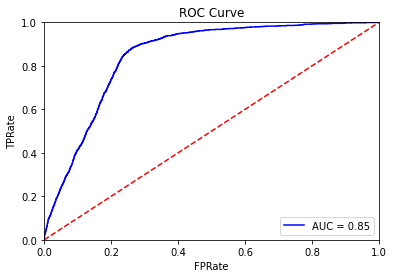

In [23]:
from sklearn.metrics import auc
import matplotlib.pyplot as plt
roc_auc = auc(fpr, tpr)
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('TPRate')
plt.xlabel('FPRate')
plt.show()

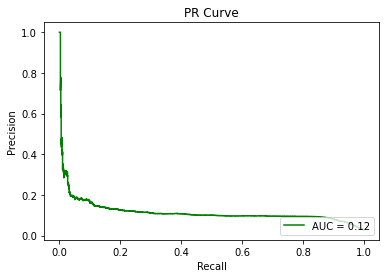

In [24]:
pr_auc = auc(recall, precision)
plt.title('PR Curve')
plt.plot(recall, precision, 'g', label = 'AUC = %0.2f' % pr_auc)
plt.legend(loc = 'lower right')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [25]:
from sklearn.metrics import average_precision_score
print(f'PR_AUC = {pr_auc}')
print(f'AP     = {average_precision_score(y_test, prob1, pos_label=2)}')

PR_AUC = 0.11679598139665254
AP     = 0.11708868086195567


# Threshold Moving

In [26]:
prob1

array([0.15712614, 0.05785476, 0.24885609, ..., 0.07935598, 0.07937282,
       0.09179645])

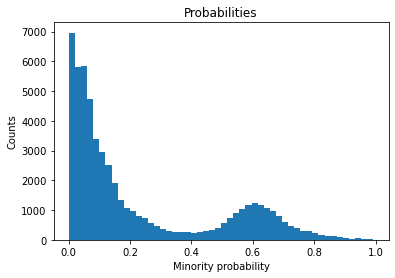

In [27]:
plt.title('Probabilities')
plt.hist(prob1, bins=50)
plt.ylabel('Counts')
plt.xlabel('Minority probability')
plt.show()

(3794,)


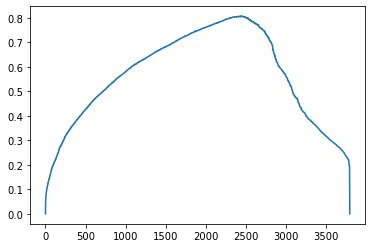

In [28]:
gmeans = np.sqrt(tpr * (1-fpr))
print(gmeans.shape)
plt.plot(gmeans)
plt.show()

In [29]:
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print( ' Best Threshold=%f, G-mean=%.3f ' % (thresholds[ix], gmeans[ix]))

 Best Threshold=0.331096, G-mean=0.807 


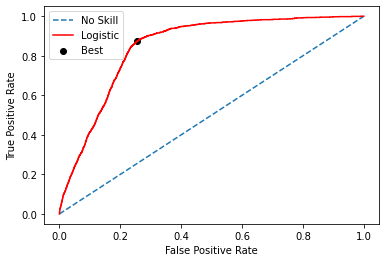

In [30]:
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, 'r', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [31]:
print(f'ix = {ix}; fpr[ix] = {fpr[ix]}; tpr[ix]={tpr[ix]}')

ix = 2428; fpr[ix] = 0.25339818393653024; tpr[ix]=0.8723404255319149


In [34]:
fscore = (2 * precision * recall) / (precision + recall)
ix = np.argmax(fscore)
print( ' Best Threshold=%f, F-measure=%.3f ' % (pr_thresh[ix], fscore[ix]))

 Best Threshold=0.552328, F-measure=0.171 


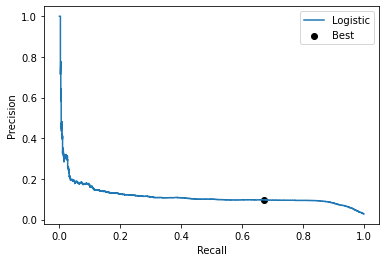

In [42]:
#no_skill = len(y_test[y_test==1]) / len(y_test)
#plt.plot([0,1], [no_skill,no_skill], linestyle= '--' , label= 'No Skill' )
plt.plot(recall, precision, label= 'Logistic' )
plt.scatter(recall[ix], precision[ix], marker= 'o' , color= 'black' , label= 'Best' )
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()